<a href="https://colab.research.google.com/github/valeromora/SenalesSistemasVM/blob/main/Parcial2_SS_real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 2 - Señales y Sistemas 2023 - 2
# Laura Isabella Valero Mora


## Pregunta 1:
Encuentre la expresión del espectro de Fourier (forma exponencial y trigonométrica) para la señal $x(t)=|6\sin(3t+π/4)|^2$, con $t\in [-\pi, \pi]$.  Presente las simulaciones respectivas para graficar el espectro y la reconstruccion de la senal en función del número de armónicos y el error
relativo. Ver Cuaderno guía serie de Fourie

##Solución:
Para el desarrollo teorico dirijirse al PDF https://drive.google.com/file/d/1RtIURgRjwrbfaKctrNPmuBqLj0FV126T/view?usp=sharing

Primero se grafica la señal x(t)

wo= 1.0
Fo= 1.5707963267948966


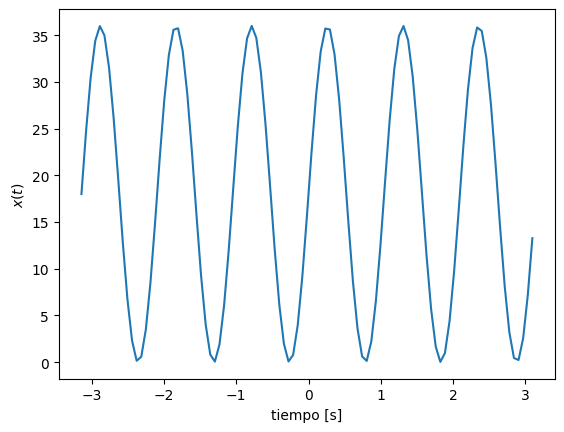

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ti = -np.pi #tiempo inicial
tf = np.pi #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 10*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo

x = abs(6*np.sin(3*tv+np.pi/4))**2 #señal de entrada
plt.plot(tv,x) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')
plt.show()

Ahora se crean las bases para la serie exponencial compleja de Fourier, para la cual se hizo la conversión del espectro pues inicialmente se calculó con la trigonometrica, es decir que se pasó de an y bn a Cn

In [2]:
#se crean las bases de la serie exponencial compleja de Fourier
T = tf - ti #intervalo de interés
N = 20 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [3]:
# graficar bases
from ipywidgets import interact,IntSlider
fig, ax = plt.subplots(1, 1,figsize=(6,3))
def pltbase(n=1):

    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.plot(tv,x,'r',linewidth=4,label='$x(t)$')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gcf().set_figwidth(6)
    plt.gcf().set_figheight(3)
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=20, min=-20), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

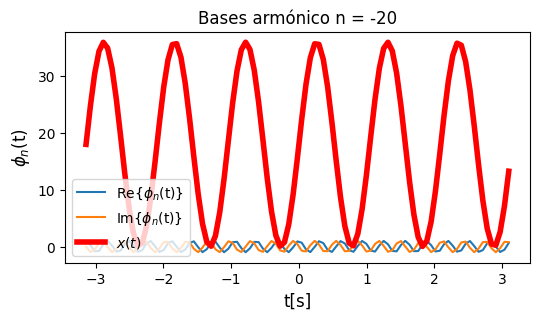

In [4]:
from matplotlib import animation, rc
from IPython.display import HTML

#figura y axes animaciónx
fig, ax = plt.subplots(1, 1,figsize=(6,3))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax.clear()
    ax.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    ax.set_xlabel("t[s]",fontsize = 12)
    ax.set_ylabel("$\phi_n$(t)",fontsize = 12)
    ax.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    ax.plot(tv,x,'r',linewidth=4,label='$x(t)$')
    ax.set_title(f'Bases armónico n = {n}')
    ax.legend(loc='lower left')
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(-N,N,1), blit=False)
rc('animation', html='jshtml')

In [5]:
anim

Ahora se especifica el valor de Cn dentro del codigo para poder hacer la reconstrucción

In [6]:
#calcular espectro
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
def calcular_cn(n):
    if n == 0:
        return 18
    elif n == 6: #or n == -6:
        return -9j
    elif n == -6:
        return 9j
    else:
        return 0

cn = np.array([calcular_cn(n) for n in nv])

cn[N] = 18 # nivel dc C_0

Ahora se grafica el espectro, su parte real de la cual vemos que hay un único valor en 0 igual a 18 y en la imaginaria dos valores, 9 y -9, justo lo que se esperaba. Además se graficó la magnitud y la fase

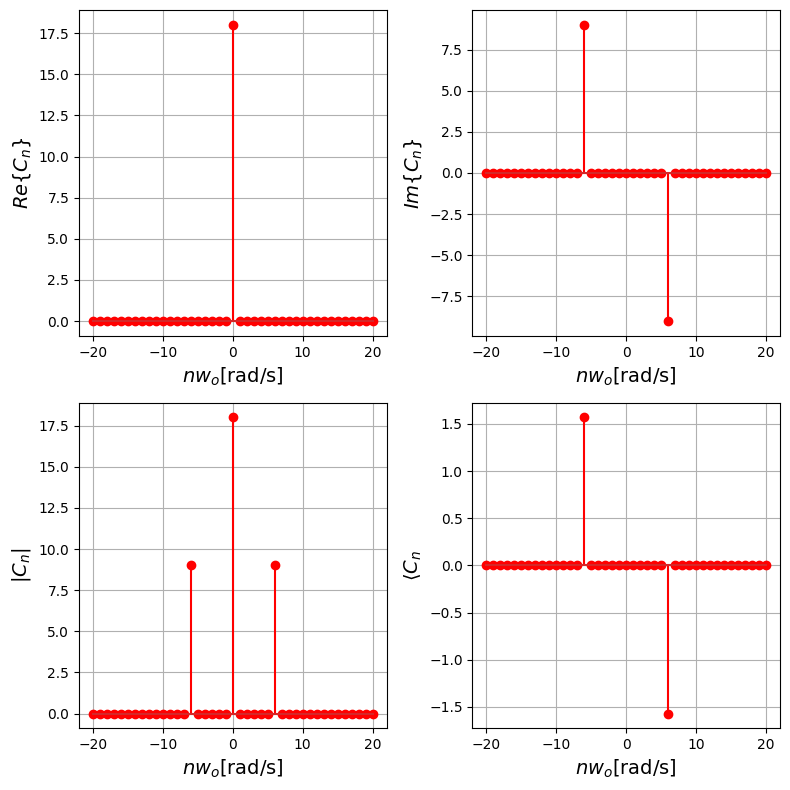

In [7]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

Ahora sí graficamos la reconstrucción de la señal, que como vemos, con un valor adecuado de armonicos el error da cero

In [8]:
#graficar reconstrucción

Px = 486 # potencia señal x(t)
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='$x(t)$') #señal original
    plt.title('E_r=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

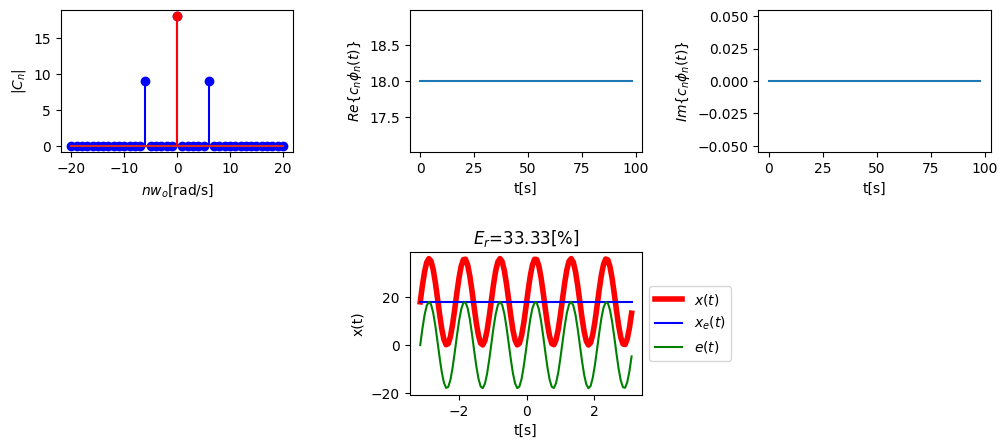

In [9]:
#figura y axes animaciónx
fig, ax = plt.subplots(2, 3,figsize=(12,5))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'$nw_o$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')

    #componentes espectrales
    ce = phin[:,ind].dot(np.diag(cn[ind]) )
    ax[0,1].plot(np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')

    ax[0,2].plot(np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')




    #reconstruccion
    er = 1- np.sum(abs(cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    #error en t
    et = x - xe

    ax[1,1].plot(tv,x,'r',linewidth=4,label='$x(t)$')
    ax[1,1].plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    ax[1,1].plot(tv,et,color='g',label='$e(t)$') # señal estimada o filtrada
    ax[1,1].set_title('$E_r$=%.2f[%%]' % (100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')

In [10]:
anim

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

## Pregunta 3:

Sea la señal portadora $c(t) = A_c\cos(2\pi F_c t),$ con $A_c,F_c\in\mathbb{R},$ y la señal mensaje $m(t)\in\mathbb{R}$. Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), $y(t) = \left(1+\frac{m(t)}{A_c}\right)c(t)$. Luego, descargue desde youtube $5$ segundos de su canción favorita (capturando del segundo 20 al 25). Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la canción escogida y con un índice de modulación de 1). Grafique las señales en tiempo y frecuencia (magnitud y fase) de la señal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada. Nota: se sugiere utilizar un canal de señal de audio para el desarrollo del ejercicio.

La parte teorica se encuentra en el PDF en la ultima pagina.
Primero se hace todo el proceso para descargar la canción con las especificaciones.

In [11]:
#simulación con canción de youtube
#instalar api youtube-dl
! pip install youtube-dl
#descargar canción de interés
link="https://www.youtube.com/watch?v=K81nvSfmc4I"
! youtube-dl --extract-audio -o "audio.%(mp3)s" --audio-format mp3  {link}

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.4 MB/s eta 0:00:00
[youtube] K81nvSfmc4I: Downloading webpage
[youtube] K81nvSfmc4I: Downloading player 2be84af7
[download] Destination: audio.NA
[download] 100% of 4.47MiB in 01:25
[ffmpeg] Destination: audio.mp3
Deleting original file audio.NA (pass -k to keep)


In [12]:
#convertir a .wav con ffmpeg para extraer audio en python
!ffmpeg -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [13]:
#instalar soundfile para cargar .wav
!pip install soundfile

In [14]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#leer archivo wav
nombre_out = "output.wav"
xa, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


Se extrae especificamente lo que pide el ejercicio y se crea la señal mensaje

In [15]:
xpro = xa.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [16]:
#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

Graficamos esta señal mensaje que se extrajo

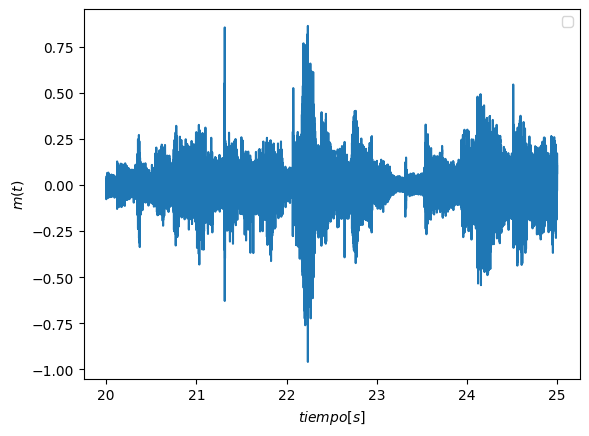

In [17]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m(t)$')
plt.legend()
plt.show()

A esta señal mensaje se le saca Fourier y se grafica en frecuencia su magnitud y su fase

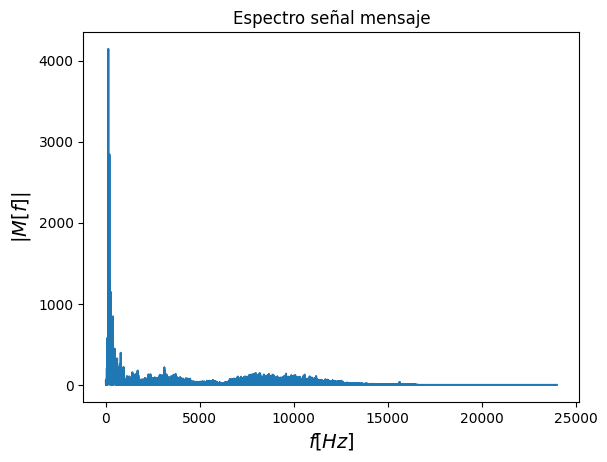

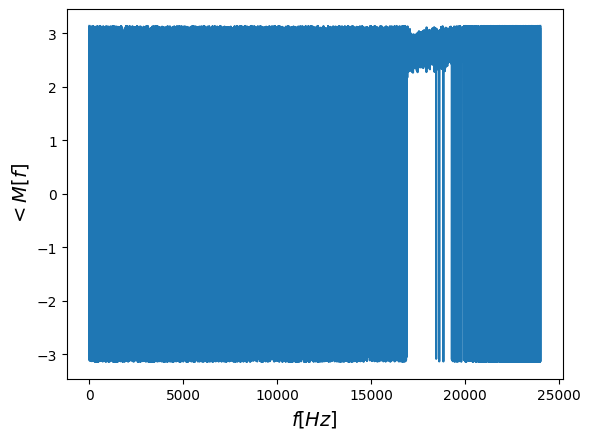

In [18]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M[f]$',fontsize = 14)
plt.show()

Ahora se hace la portadora que es un coseno con indice de modulación 1

In [19]:
Fc = 15000 #frecuencia portadora
Im = 1 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*tt) #portadora

In [20]:
#repoducir portadora
Audio(c,rate=fs)

Se le sacan los mismos graficos, primero en el tiempo que se ve así por el valor de la frecuncia escogida (15000)

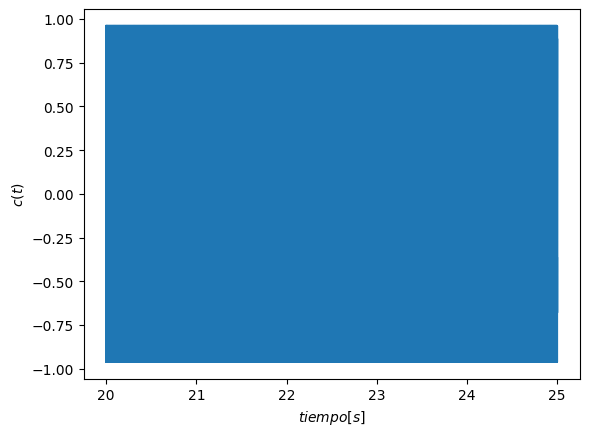

In [21]:
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

Ahora se le saca Fourier y se grafica la magnitud y la fase

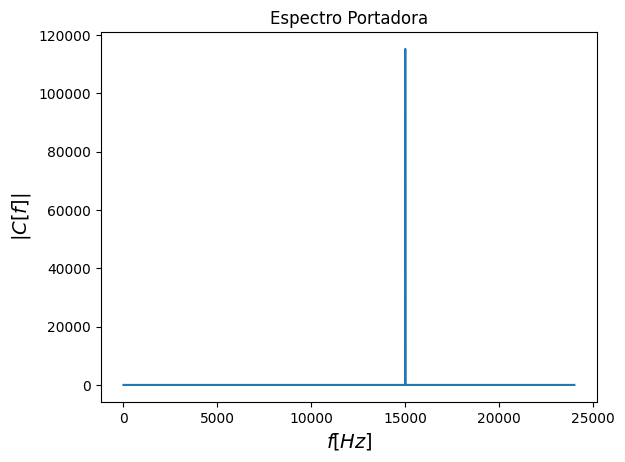

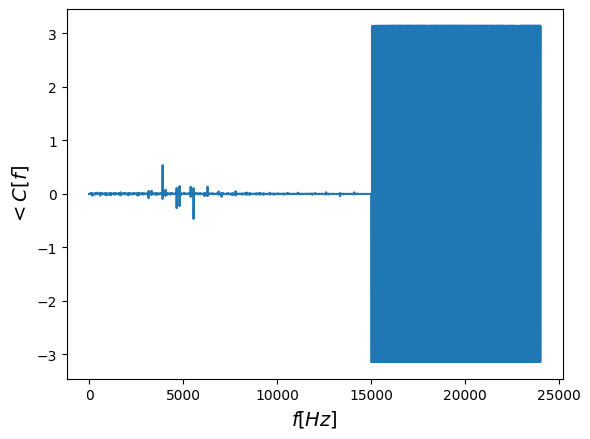

In [22]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Cw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<C[f]$',fontsize = 14)
plt.show()

Ahora se modula la señal mensaje con la portadora

In [23]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM

In [24]:
#repoducir modulada
Audio(y,rate=fs)

Se grafica la señal obtenida de la modulación

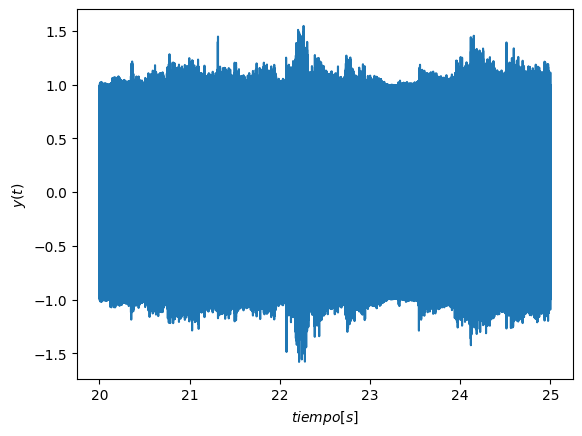

In [25]:
plt.plot(tt,y) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

Tambien se le hace Fourier y se grafica la magnitud y la fase

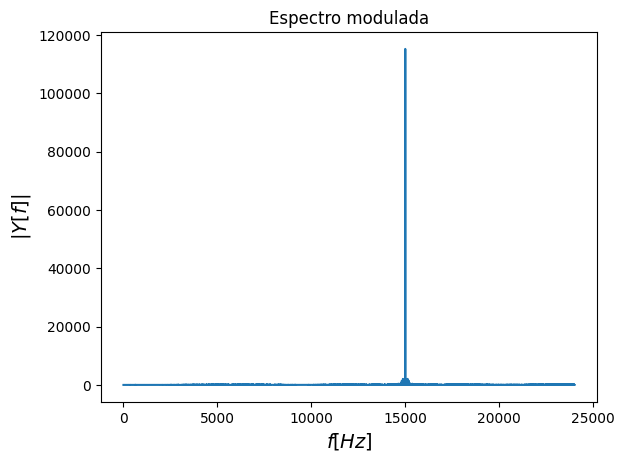

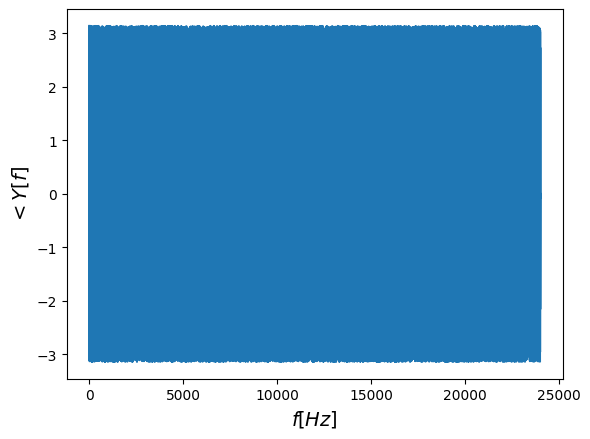

In [26]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

## Pregunta 3:
Sea la base de datos para el monitoreo de condición (fallos) en rodamientos a partir del análisis de vibraciones descrita en [Case Western Reserve Experiments](https://engineering.case.edu/bearingdatacenter). Las señales fueron adquiridas para las siguientes condiciones (clases): i) Normal bearing (Nor), fault in the internal train (IR1), fault in the external train (IR2), and fault in the rolling element-ball (BE). Además, los fallos se generaron para tres niveles de severidad (profundidad): 0.007′′, 0.014′′, and 0.021′′ y tres velocidades de operación (1730, 1750, 1772, and 1797 [rpm]). Los datos fueron adquiridos a 12 kHz. Por consiguiente, se tienen los siguientes parámetros de estudio: $F_s=12k$ [Hz] cantidad de puntos en el tiempo $4096$ y cantidad de clases $C = 10$.

Grafique la señal promedio de cada fallo en el tiempo y en la frecuencia.

Utilizando la transformada rápida de Fourier diseñe y construya un detector fallos en rodamientos a partir de señales de vibración y sus etiquetas en los arreglos Xtrain y Ytrain (ver cuaderno de apoyo). Genere las predicciones de fallos para el arreglo Xtest.

Primero se descarga la base de datos

In [27]:
#data downloaded for google drive
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

--2023-11-09 20:45:12--  https://docs.google.com/uc?export=download&confirm=t&id=1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn
Resolving docs.google.com (docs.google.com)... 172.217.204.102, 172.217.204.100, 172.217.204.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qrku2uuba4nn1iic880apbc57l6nn3sk/1699562700000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=146aca43-2d2e-4495-ab16-e4a887ce58c1 [following]
--2023-11-09 20:45:12--  https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qrku2uuba4nn1iic880apbc57l6nn3sk/1699562700000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=146aca43-2d2e-4495-ab16-e4a887ce58c1
Resolving doc-10-0s-docs.googleusercontent.com (doc-10-0s-docs.googleusercontent.com)... 173.194.216.

In [28]:
#librerias
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

#cargar datos
path_ = 'CaractCE.mat'#Case Western Database
dicX = sio.loadmat(path_)

Es necesario mencionar que los puntos en el tiempo son valores pertenecientes a la base de datos y son de 4000, no de 4096, justo como se observa en las dimenciones de Xt.
Aqui se relacionan las clases con la profundidad, dando lugar a 10 tipos de fallos, como se ve en el vector labels_

In [29]:
Xt = dicX['F'] #datos en el tiempo
Fs = 12000 #frecuencia de muestreo
Tl = Xt.shape[1]/Fs #tamaño del segmento
print('Xt shape:',Xt.shape)
print('tiempo [s]', Tl)

Y = dicX['E']
Ytrue = Y[:,2] #clases fallos en los rodamientos

labels_ = ['NOR','IR1_0.007´´','IR1_0.014´´','IR1_0.021´´',
           'IR2_0.007´´','IR2_0.014´´','IR2_0.021´´',
           'BE_0.007´´','BE_0.014´´','BE_0.021´´'
           ] #nombres de las clases

Xt shape: (1200, 4000)
tiempo [s] 0.3333333333333333


Ahora este vector se codifica en un nuevo vector para tener los tipos de fallo del vector labels_ como números

In [30]:
print(Ytrue.shape) #etique membresia de los datos 10 posibles valores
print(np.unique(Ytrue))

(1200,)
[ 1  2  3  4  5  6  7  8  9 10]


Aqui vemos que tenemos 840 datos para hacer el modelo y 360 para probar, ademas el vector Ytrain contiene la clasificación del tipo de daño de los 840 motores dentro de Xtrain

In [31]:
#partir datos para train y test
Xtrain, Xtest, Ytrain, _ = train_test_split(Xt, Ytrue, test_size=0.3)

print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape }Xtest shape {Xtest.shape} ")

Xtrain shape (840, 4000), Ytrain shape (840,)Xtest shape (360, 4000) 


Ahora se calcula es espectro de Fourier de el vector Xtrain y se grafica en el tiempo y en la frecuencia, además se normaliza entre 0 y 1

In [33]:
#calcular espectro de Fourier Xtrain
vf = np.fft.rfftfreq(Xtrain.shape[1],1/Fs) #freq vector
Xw = (abs(np.fft.rfft(Xtrain))) # FFT
Xw.shape

(840, 2001)

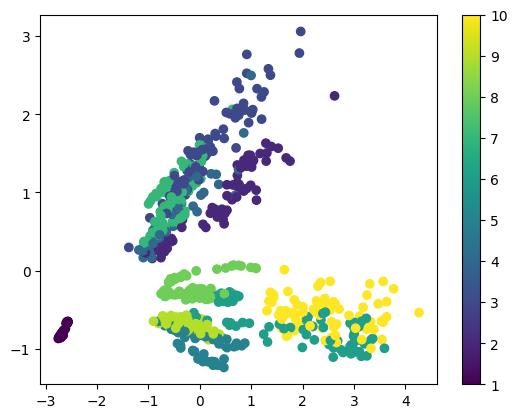

In [34]:
#graficar espectro para clases representativas
sca_ = MinMaxScaler()
Xw_ = sca_.fit_transform(Xw.T).T
#red = TSNE(perplexity = 15,n_components=2,random_state=123,learning_rate='auto',init='pca')
red = PCA(n_components=2)
Z = red.fit_transform(Xw_)

plt.scatter(Z[:,0],Z[:,1],c=Ytrain, label='Xtrain')
plt.colorbar()
plt.show()

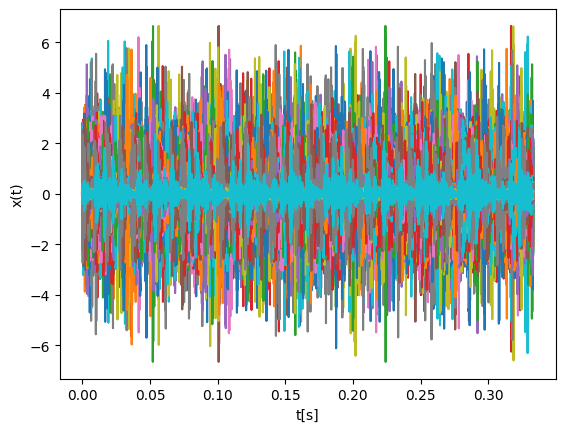

In [35]:
#grafica en tiempo
plt.plot(np.arange(0,Tl,1/Fs),Xtrain.T)
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

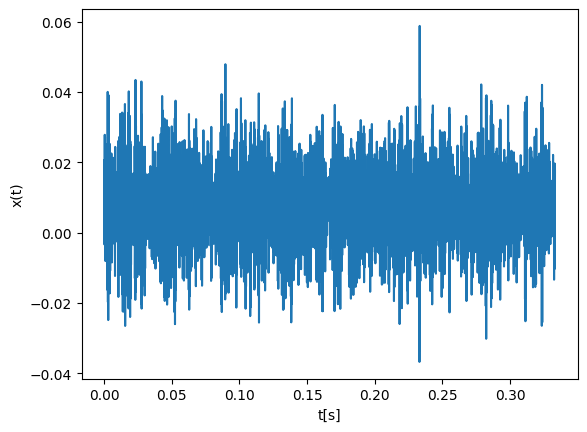

In [36]:
plt.plot(np.arange(0,Tl,1/Fs),Xtrain.mean(axis=0).T) #promedia
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

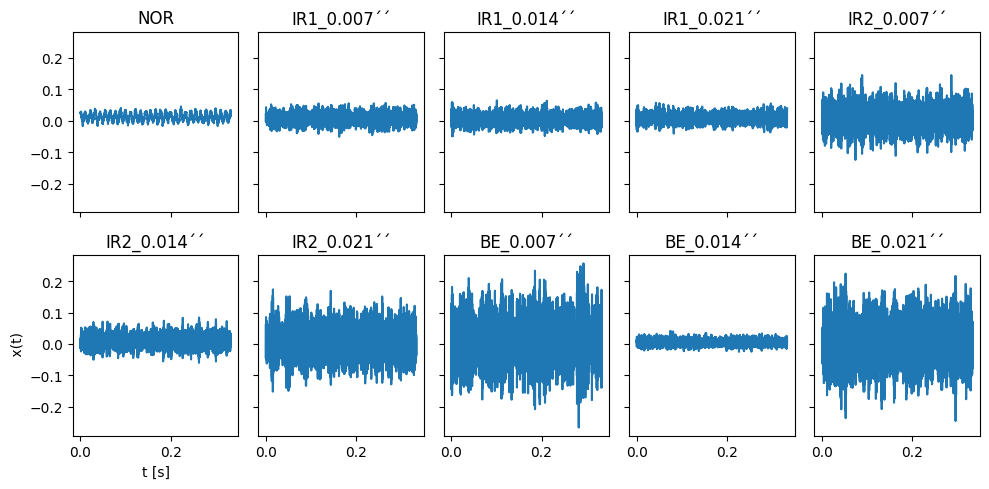

In [37]:
#graficar señales en tiempo y en frecuencia desde Xtrain y Ytrain

nrows = 2
ncols = 5

#grafica en el tiempo señales promedio por clase
fig, ax = plt.subplots(nrows = nrows, ncols = ncols,
                       sharex = True, sharey=True, figsize=(10,5))
tv = np.arange(0,Tl,1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i,j].plot(tv,Xtrain[Ytrain==ncols*i+j+1].mean(axis=0))
     ax[i,j].set_title(labels_[ncols*i+j])
ax[1,0].set_xlabel('t [s]')
ax[1,0].set_ylabel(' x(t)')
plt.tight_layout()
plt.show()

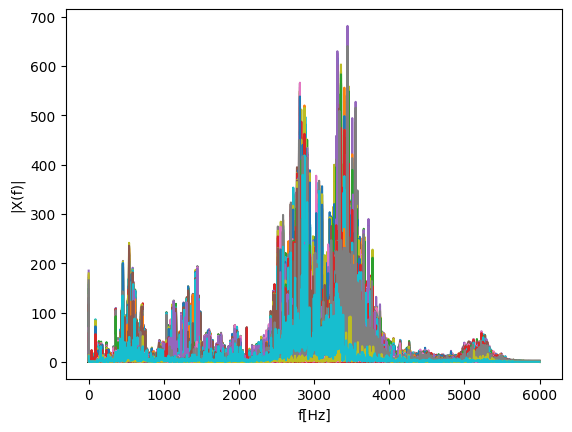

In [38]:
plt.plot(vf,abs(Xw).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

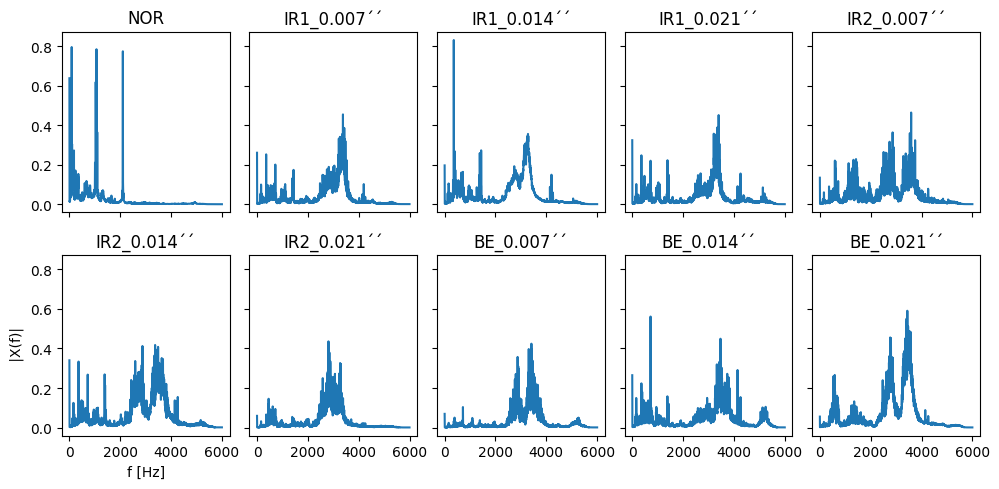

In [39]:
#grafica frecuencia - señales promedio por clase
fig, ax = plt.subplots(nrows = nrows, ncols = ncols,
                       sharex = True, sharey=True, figsize=(10,5))
tv = np.arange(0,Tl,1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i,j].plot(vf,abs(Xw_[Ytrain==ncols*i+j+1]).mean(axis=0))
     ax[i,j].set_title(labels_[ncols*i+j])
ax[1,0].set_xlabel('f [Hz]')
ax[1,0].set_ylabel(' |X(f)|')
plt.tight_layout()
plt.show()

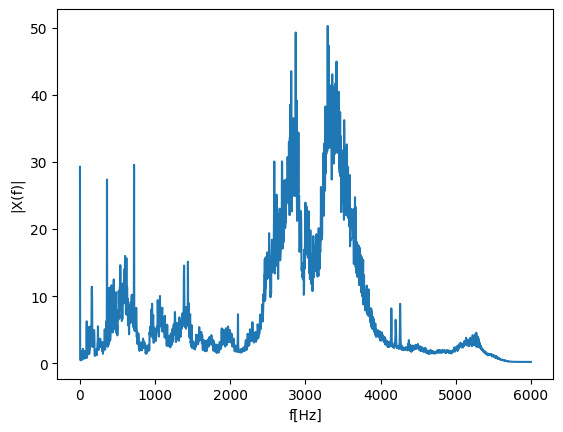

In [40]:
plt.plot(vf,abs(Xw).mean(axis=0).T) #promedio
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

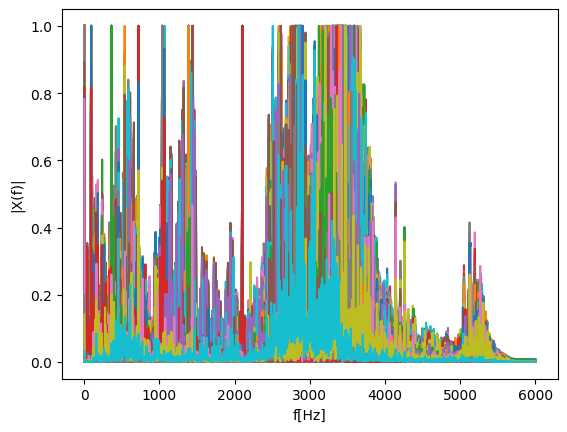

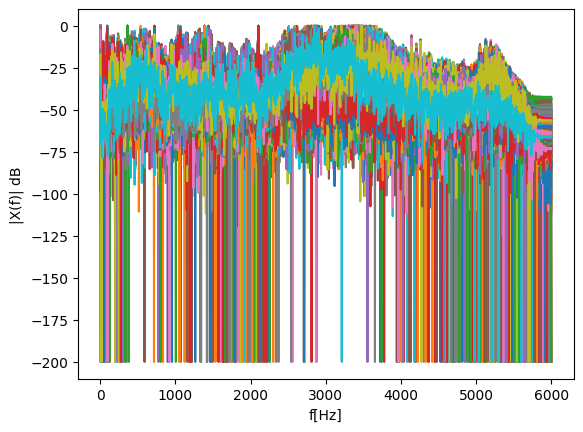

In [41]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

Ahora se hace lo mismo pero con el vector del que se quiere determinar el tipo de fallo

In [42]:
#Calculo de Fourier xtest
vft = np.fft.rfftfreq(Xtest.shape[1],1/Fs)
Xwt = (abs(np.fft.rfft(Xtest))) # FFT
Xwt.shape

(360, 2001)

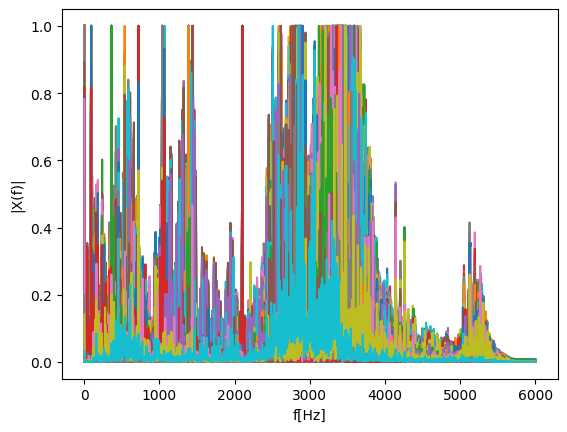

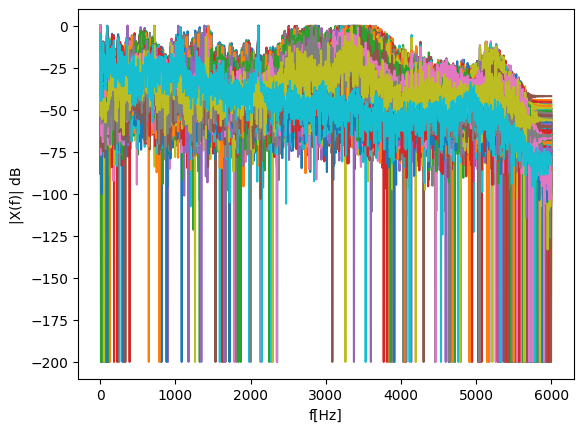

In [43]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xwt_ = sca.fit_transform(abs(Xwt).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xwt_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

Ahora se hace el codigo para determinar el tipo de fallo.
Dentro de un for que recorre todos los elementos de Xtest, primero se utiliza el cdist para calcular las distancias entre cada Xtest y el calculo de fourier de Xtrain, luego con el argmin encuencuentra el que tenga la distancia minima y luego del Xtrain, utiliza su etiqueta para tambien darsela al Xtest que se este evaluando (estas etiquetas estan dentro del Ytrain). Todos estos valores, se guardan dentro de vector_labelsYtrain

In [44]:
from scipy.spatial.distance import cdist

vector_labelsYtrain = []

for i in range (len(Xtest)):
  p=cdist(Xwt_,Xw_)
  vector_labelsYtrain.append(Ytrain[np.argmin(p[i,])])

vector_labelsYtrain #vector de 360 que contiene el tipo de fallo en orden de los motores

[1,
 3,
 4,
 4,
 6,
 6,
 6,
 5,
 10,
 7,
 2,
 2,
 2,
 1,
 9,
 2,
 8,
 6,
 9,
 4,
 5,
 3,
 5,
 5,
 8,
 1,
 5,
 4,
 10,
 4,
 10,
 5,
 7,
 4,
 3,
 8,
 2,
 2,
 6,
 8,
 4,
 8,
 8,
 7,
 8,
 9,
 8,
 1,
 7,
 6,
 8,
 7,
 6,
 9,
 10,
 5,
 1,
 1,
 2,
 6,
 6,
 5,
 6,
 2,
 6,
 1,
 1,
 5,
 3,
 4,
 5,
 2,
 3,
 5,
 8,
 8,
 3,
 4,
 7,
 6,
 7,
 3,
 2,
 3,
 7,
 10,
 10,
 7,
 9,
 2,
 3,
 7,
 7,
 1,
 1,
 9,
 8,
 9,
 1,
 10,
 8,
 5,
 4,
 5,
 7,
 9,
 7,
 2,
 3,
 2,
 7,
 10,
 6,
 3,
 6,
 6,
 7,
 2,
 3,
 8,
 1,
 10,
 6,
 4,
 1,
 7,
 6,
 7,
 9,
 10,
 2,
 1,
 10,
 6,
 3,
 8,
 1,
 2,
 3,
 5,
 8,
 3,
 10,
 6,
 5,
 4,
 6,
 2,
 6,
 8,
 5,
 10,
 5,
 10,
 10,
 3,
 6,
 6,
 1,
 1,
 5,
 7,
 2,
 4,
 5,
 4,
 4,
 7,
 9,
 5,
 10,
 5,
 1,
 10,
 2,
 7,
 5,
 5,
 7,
 3,
 7,
 8,
 8,
 2,
 1,
 10,
 2,
 10,
 7,
 4,
 4,
 10,
 8,
 3,
 9,
 9,
 4,
 7,
 10,
 10,
 3,
 10,
 10,
 6,
 2,
 4,
 5,
 3,
 6,
 4,
 10,
 3,
 4,
 9,
 6,
 10,
 9,
 6,
 7,
 8,
 5,
 3,
 4,
 6,
 3,
 2,
 9,
 3,
 9,
 10,
 3,
 3,
 9,
 2,
 4,
 5,
 5,
 9,
 9,
 9,
 1,
 8,
 6,
 

Ahora se hace un tipo de converción para en ves de poner los númerso poner el tipo de fallo y se crea un vector de palabras

In [45]:
convers = []
for i in range (len(Xtest)):
  convers.append(labels_[vector_labelsYtrain[i]-1])

convers

['NOR',
 'IR1_0.014´´',
 'IR1_0.021´´',
 'IR1_0.021´´',
 'IR2_0.014´´',
 'IR2_0.014´´',
 'IR2_0.014´´',
 'IR2_0.007´´',
 'BE_0.021´´',
 'IR2_0.021´´',
 'IR1_0.007´´',
 'IR1_0.007´´',
 'IR1_0.007´´',
 'NOR',
 'BE_0.014´´',
 'IR1_0.007´´',
 'BE_0.007´´',
 'IR2_0.014´´',
 'BE_0.014´´',
 'IR1_0.021´´',
 'IR2_0.007´´',
 'IR1_0.014´´',
 'IR2_0.007´´',
 'IR2_0.007´´',
 'BE_0.007´´',
 'NOR',
 'IR2_0.007´´',
 'IR1_0.021´´',
 'BE_0.021´´',
 'IR1_0.021´´',
 'BE_0.021´´',
 'IR2_0.007´´',
 'IR2_0.021´´',
 'IR1_0.021´´',
 'IR1_0.014´´',
 'BE_0.007´´',
 'IR1_0.007´´',
 'IR1_0.007´´',
 'IR2_0.014´´',
 'BE_0.007´´',
 'IR1_0.021´´',
 'BE_0.007´´',
 'BE_0.007´´',
 'IR2_0.021´´',
 'BE_0.007´´',
 'BE_0.014´´',
 'BE_0.007´´',
 'NOR',
 'IR2_0.021´´',
 'IR2_0.014´´',
 'BE_0.007´´',
 'IR2_0.021´´',
 'IR2_0.014´´',
 'BE_0.014´´',
 'BE_0.021´´',
 'IR2_0.007´´',
 'NOR',
 'NOR',
 'IR1_0.007´´',
 'IR2_0.014´´',
 'IR2_0.014´´',
 'IR2_0.007´´',
 'IR2_0.014´´',
 'IR1_0.007´´',
 'IR2_0.014´´',
 'NOR',
 'NOR',
 'IR2_0.0

Por ultimo se recorre Xtest para darle un diagnostico sobre el tipo de fallo a cada motor

In [46]:
for i in range (len(Xtest)):
  print("El fallo del motor ", i, "es ", vector_labelsYtrain[i], "lo que corresponde a un daño tipo", convers[i])

El fallo del motor  0 es  1 lo que corresponde a un daño tipo NOR
El fallo del motor  1 es  3 lo que corresponde a un daño tipo IR1_0.014´´
El fallo del motor  2 es  4 lo que corresponde a un daño tipo IR1_0.021´´
El fallo del motor  3 es  4 lo que corresponde a un daño tipo IR1_0.021´´
El fallo del motor  4 es  6 lo que corresponde a un daño tipo IR2_0.014´´
El fallo del motor  5 es  6 lo que corresponde a un daño tipo IR2_0.014´´
El fallo del motor  6 es  6 lo que corresponde a un daño tipo IR2_0.014´´
El fallo del motor  7 es  5 lo que corresponde a un daño tipo IR2_0.007´´
El fallo del motor  8 es  10 lo que corresponde a un daño tipo BE_0.021´´
El fallo del motor  9 es  7 lo que corresponde a un daño tipo IR2_0.021´´
El fallo del motor  10 es  2 lo que corresponde a un daño tipo IR1_0.007´´
El fallo del motor  11 es  2 lo que corresponde a un daño tipo IR1_0.007´´
El fallo del motor  12 es  2 lo que corresponde a un daño tipo IR1_0.007´´
El fallo del motor  13 es  1 lo que corresp